# Setup

In [ ]:
import pandas as pd
from datasets import load_dataset
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import re

def plot_word_cloud(text, title="Text"):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    wc = WordCloud(max_words=500, width=800, height=400).generate(text)
    plt.imshow(wc, interpolation='bilinear')

# Data Exploration
## Train + Validation

In [ ]:
dataset = load_dataset("knkarthick/dialogsum")

train_df = dataset["train"].to_pandas()
valid_df = dataset["validation"].to_pandas()

train_df["split"] = "TRAIN"
valid_df["split"] = "VAL"

df = pd.concat([train_df, valid_df])
print(df.info())
df.head()

README.md:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/442k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

<class 'pandas.core.frame.DataFrame'>
Index: 12960 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12960 non-null  object
 1   dialogue  12960 non-null  object
 2   summary   12960 non-null  object
 3   topic     12960 non-null  object
 4   split     12960 non-null  object
dtypes: object(5)
memory usage: 607.5+ KB
None


id                                           dialogue  \
0  train_0  #Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...   
1  train_1  #Person1#: Hello Mrs. Parker, how have you bee...   
2  train_2  #Person1#: Excuse me, did you see a set of key...   
3  train_3  #Person1#: Why didn't you tell me you had a gi...   
4  train_4  #Person1#: Watsup, ladies! Y'll looking'fine t...   

                                             summary              topic  split  
0  Mr. Smith's getting a check-up, and Doctor Haw...     get a check-up  TRAIN  
1  Mrs Parker takes Ricky for his vaccines. Dr. P...           vaccines  TRAIN  
2  #Person1#'s looking for a set of keys and asks...          find keys  TRAIN  
3  #Person1#'s angry because #Person2# didn't tel...  have a girlfriend  TRAIN  
4  Malik invites Nikki to dance. Nikki agrees if ...              dance  TRAIN

In [ ]:
assert len(set(df["id"].values)) == len(df), "ids are not unique"
print(df["topic"].value_counts())

topic
shopping                  178
job interview             172
daily casual talk         126
phone call                 89
order food                 82
                         ... 
first date                  1
downtown life               1
cancellation of dinner      1
buy train ticket            1
a missing page              1
Name: count, Length: 7695, dtype: int64


In [ ]:
dialog_counts = df["dialogue"].value_counts()
duplicated_dialogs = dialog_counts[dialog_counts > 1]
print("Duplicated Dialogues:")
df.loc[df["dialogue"].isin(duplicated_dialogs.index)].sort_values(by="dialogue")

Duplicated Dialogues:


id                                           dialogue  \
1626    train_1626  #Person1#: Any plans tonight? \n#Person2#: Not...   
9118    train_9118  #Person1#: Any plans tonight? \n#Person2#: Not...   
7618    train_7618  #Person1#: I'm searching for an old music box....   
11492  train_11492  #Person1#: I'm searching for an old music box....   

                                                 summary  \
1626   #Person1# invites #Person2# to have a drink be...   
9118   #Person1# invites #Person2# to take a hang-out...   
7618   #Person1# is searching for an old music box ma...   
11492  #Person1# wants to buy an old music box with d...   

                      topic  split  
1626   social communication  TRAIN  
9118         after inteview  TRAIN  
7618          old music box  TRAIN  
11492             music box  TRAIN

In [ ]:
summary_counts = df["summary"].value_counts()
duplicated_summaries = summary_counts[summary_counts > 1]
print("Duplicated Summaries:")
df.loc[df["summary"].isin(duplicated_summaries.index)].sort_values(by="summary")

Duplicated Summaries:


id                                           dialogue  \
6189    train_6189  #Person1#: How much does it cost for a bus pas...   
6640    train_6640  #Person1#: How much for a bus pass?\n#Person2#...   
6312    train_6312  #Person1#: I would like to get some meat today...   
8989    train_8989  #Person1#: I would like to purchase some meat....   
5146    train_5146  #Person1#: I met a girl in elevator this morni...   
1237    train_1237  #Person1#: I met a girl in elevator this morni...   
7862    train_7862  #Person1#: There is a tornado warning on. My m...   
250      train_250  #Person1#: There is a tornado warning on. My m...   
8822    train_8822  #Person1#: Excuse me, sir, didn't you see the ...   
11236  train_11236  #Person1#: Excuse me, sir. Didn't you see the ...   
4909    train_4909  #Person1#: May I take your order?\n#Person2#: ...   
9115    train_9115  #Person1#: May I take your order? \n#Person2#:...   
9835    train_9835  #Person1#: Good morning, Madam, can I take you...   
9850    train_9850  #Person1#: Good morning, Madam, can I take you...   
8024    train_8024  #Person1#: Are you free tomorrow night?\n#Pers...   
4327    train_4327  #Person1#: Would you like to have dinner with ...   
1178    train_1178  #Person1#: Are you going to watch the Indy Fiv...   
5841    train_5841  #Person1#: Are you going to watch the Indy Fiv...   
10360  train_10360  #Person1#: Tom, you promised to cut the lung. ...   
2680    train_2680  #Person1#: Tom, you promised to cut the lung. ...   
5760    train_5760  #Person1#: Hello, is this the ABC company?\n#P...   
5780    train_5780  #Person1#: Hello, is this the ABC Company?\n#P...   
2026    train_2026  #Person1#: what a nice garden! Look at these t...   
8249    train_8249  #Person1#: what a nice garden! Look at these t...   
1085    train_1085  #Person1#: I'd like to take this opportunity t...   
9605    train_9605  #Person1#: I'd like to take this opportunity t...   
5762    train_5762  #Person1#: Tom, aren't you a little too old to...   
254      train_254  #Person1#: Tom, aren't you a little too old to...   
6135    train_6135  #Person1#: I'm going to go shopping for grocer...   
2496    train_2496  #Person1#: I'm going to go shopping for grocer...   
8975    train_8975  #Person1#: I'm not a Christian. I just want to...   
11611  train_11611  #Person1#: I'm not a Christian. I just want to...   
3702    train_3702  #Person1#: Tomorrow is my first day at work, w...   
1578    train_1578  #Person1#: Tomorrow will be my first day at wo...   
5058    train_5058  #Person1#: Excuse me. Could you tell me where ...   
10168  train_10168  #Person1#: Excuse me, can you tell me where th...   
10525  train_10525  #Person1#: I need to find the cereal aisle. \n...   
11253  train_11253  #Person1#: I can't seem to find the cereal ais...   
9508    train_9508  #Person1#: What's the matter with you, then? Y...   
11313  train_11313  #Person1#: What's the matter with you, then? Y...   
3403    train_3403  #Person1#: How do you feel? \n#Person2#: I lik...   
3394    train_3394  #Person1#: How do you feel?\n#Person2#: I like...   
1976    train_1976  #Person1#: Hello there! Come on in! Don't just...   
1550    train_1550  #Person1#: Hello there! Come on in! Don't just...   
2705    train_2705  #Person1#: Can I help you?\n#Person2#: Yes, I'...   
2693    train_2693  #Person1#: Can I help you?\n#Person2#: Yes, I'...   
7684    train_7684  #Person1#: Billy, you are late again.\n#Person...   
4619    train_4619  #Person1#: Billy, you are late again.\n#Person...   

                                                 summary  \
6189   #Person1# asks #Person2# some questions about ...   
6640   #Person1# asks #Person2# some questions about ...   
6312   #Person1# buys a pound of ground beef and thre...   
8989   #Person1# buys a pound of ground beef and thre...   
5146   #Person1# complains about the strict dressing ...   
1237   #Person1# complains about the strict dressing ...   
7862   #Person1# e

In [ ]:
dialog_summary_counts = df[["dialogue", "summary"]].value_counts()
duplicated_dialogs_summaries = dialog_summary_counts[dialog_summary_counts > 1]
print("Duplicated Dialogue-Summary Pairs:\n", duplicated_dialogs_summaries)

Duplicated Dialogue-Summary Pairs:
 Series([], Name: count, dtype: int64)


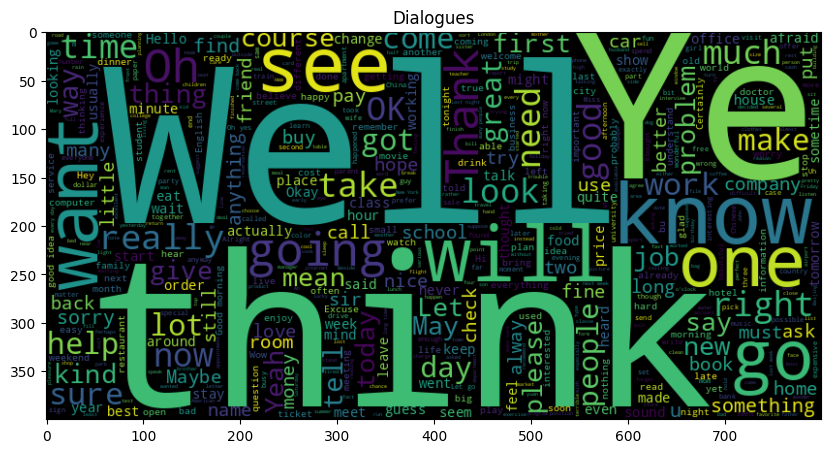

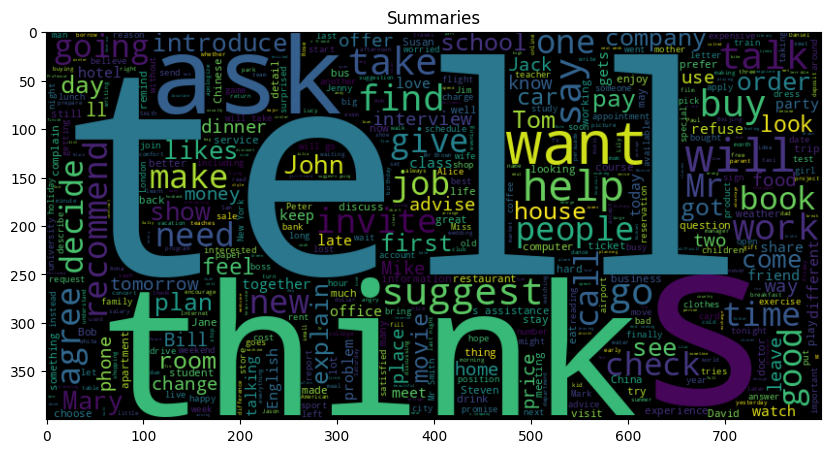

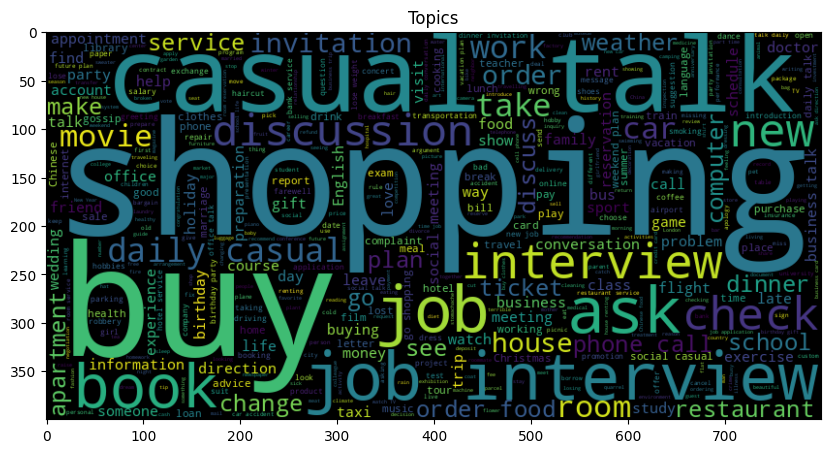

In [ ]:
plot_word_cloud("\n".join(df["dialogue"].apply(lambda x: re.sub(r"#.*?#", "", x))), "Dialogues")
plot_word_cloud("\n".join(df["summary"].apply(lambda x: re.sub(r"#.*?#", "", x))), "Summaries")
plot_word_cloud("\n".join(df["topic"]), "Topics")

<Axes: ylabel='Frequency'>

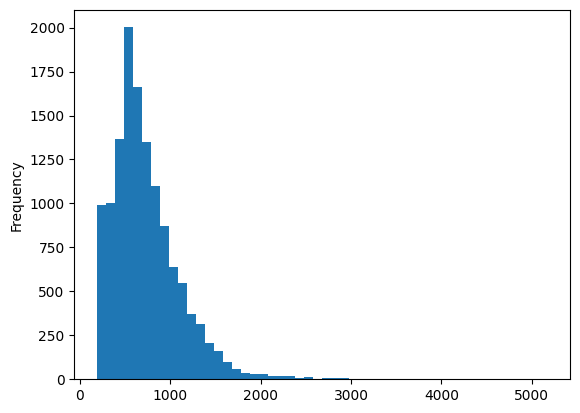

In [ ]:
df["char_dialogue_length"] = df["dialogue"].apply(len)
df["char_dialogue_length"].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

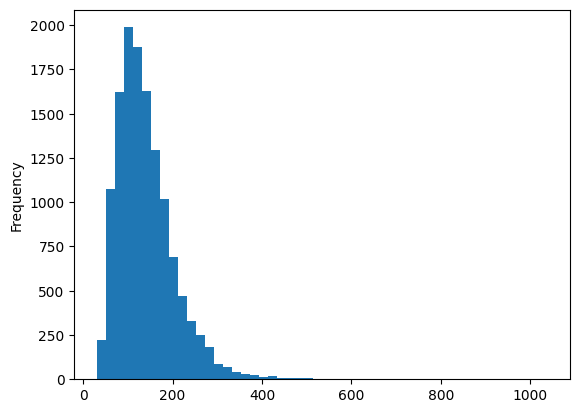

In [ ]:
df["char_summary_length"] = df["summary"].apply(len)
df["char_summary_length"].plot.hist(bins=50)

## Train vs. Validation

In [ ]:
train_topics = df.loc[df["split"] == "TRAIN", "topic"].value_counts()
val_topics = df.loc[df["split"] == "VAL", "topic"].value_counts()

print("Train topics counts:")
print(train_topics)
print("\nValidation topics counts:")
print(val_topics)
print("\nNumber of common topics:", len(set(train_topics.index) & set(val_topics.index)))

Train topics counts:
topic
shopping                 174
job interview            161
daily casual talk        125
phone call                89
order food                79
                        ... 
eat ice creams             1
marriage predicaments      1
ways of commuting          1
food comment               1
baggage pack               1
Name: count, Length: 7434, dtype: int64

Validation topics counts:
topic
job interview               11
go shopping                  6
shopping                     4
book a room                  4
see a doctor                 4
                            ..
buy textbooks                1
playing music                1
explanation of nanometer     1
a thanks call                1
summer vacation              1
Name: count, Length: 455, dtype: int64

Number of common topics: 194


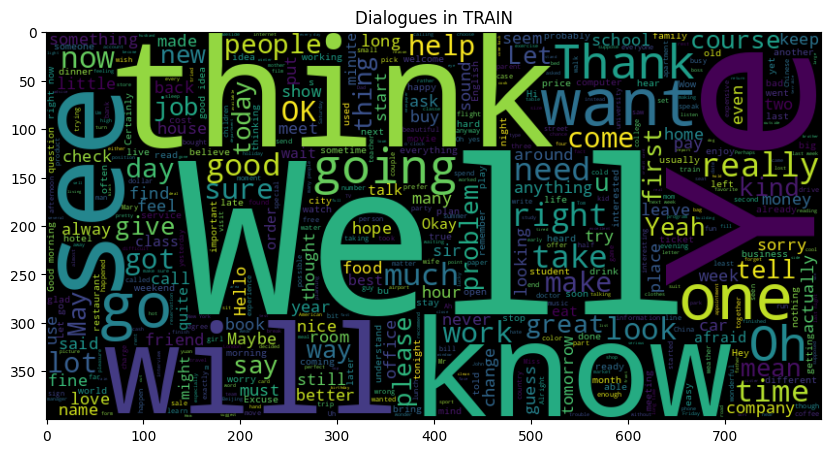

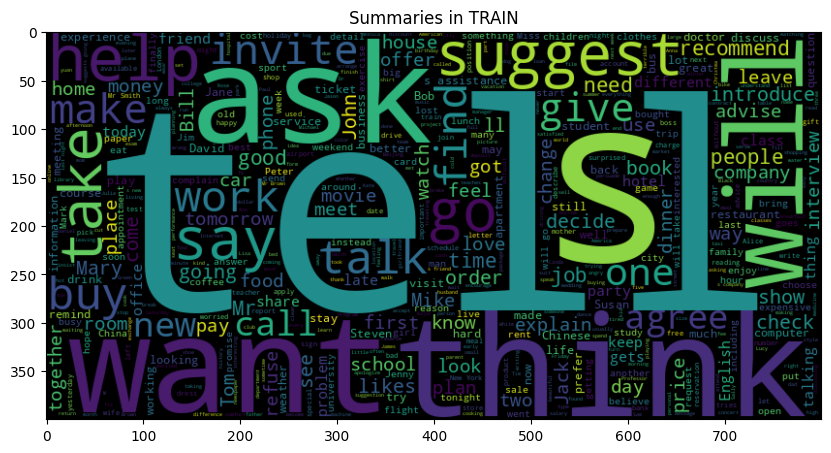

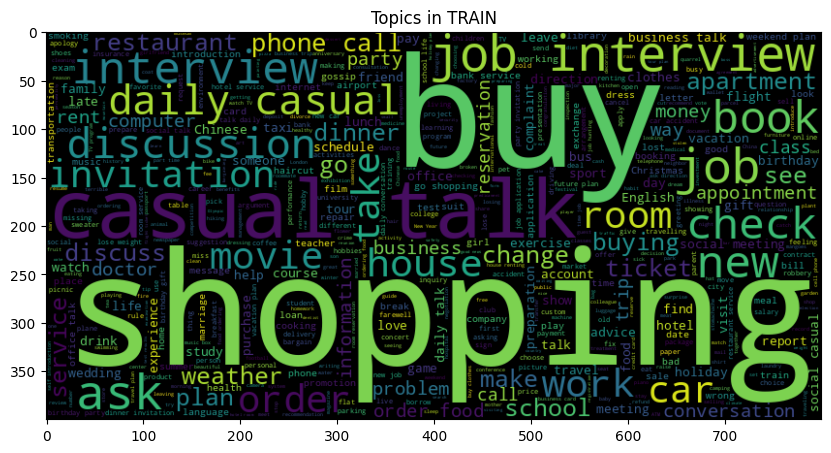

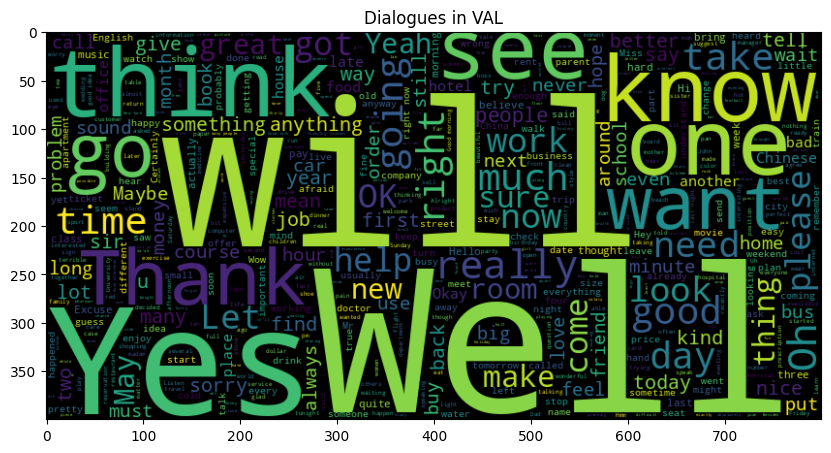

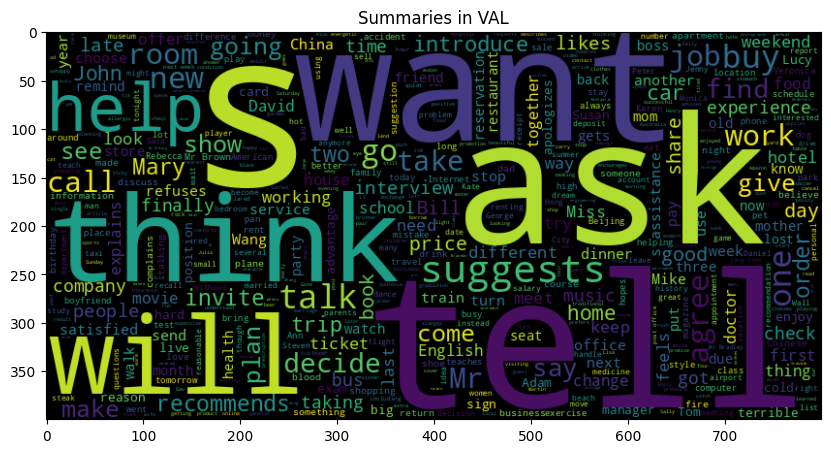

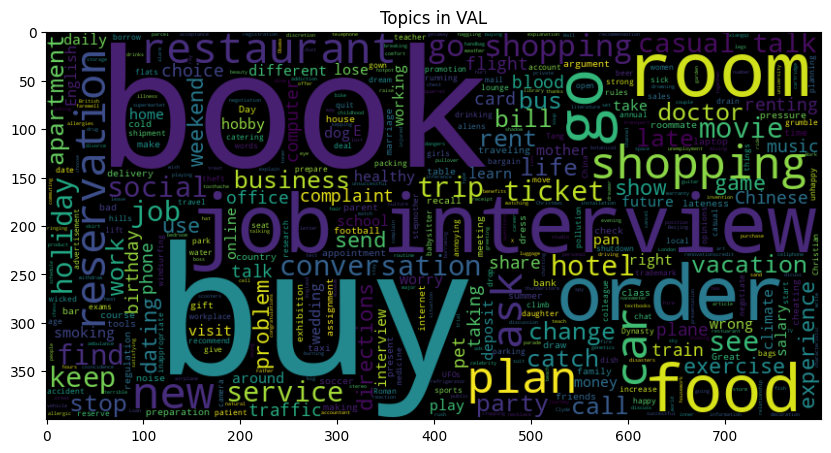

In [ ]:
SPLITS = ["TRAIN", "VAL"]
for split in SPLITS:
    plot_word_cloud("\n".join(df.loc[df["split"] == split, "dialogue"].apply(lambda x: re.sub(r"#.*?#", "", x))), f"Dialogues in {split}")
    plot_word_cloud("\n".join(df.loc[df["split"] == split, "summary"].apply(lambda x: re.sub(r"#.*?#", "", x))), f"Summaries in {split}")
    plot_word_cloud("\n".join(df.loc[df["split"] == split, "topic"]), f"Topics in {split}")